In [3]:
import scipy.io as sio
from keras.models import Sequential, Model, load_model
from keras import backend as BK
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Decodered original spectrogram')

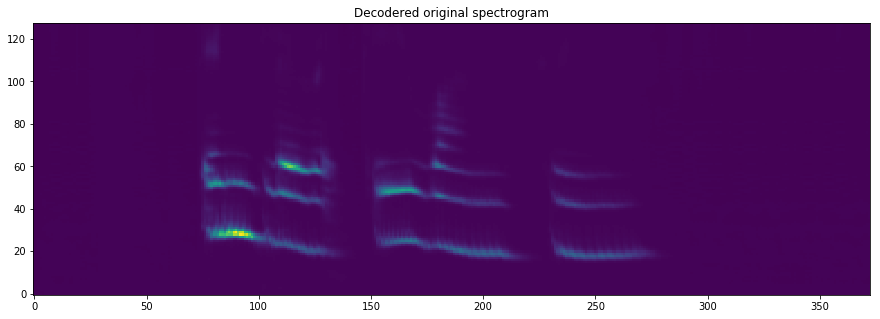

In [2]:
# Define cost function
def corr2_mse_loss(a,b):
    a = BK.tf.subtract(a, BK.tf.reduce_mean(a))
    b = BK.tf.subtract(b, BK.tf.reduce_mean(b))
    tmp1 = BK.tf.reduce_sum(BK.tf.multiply(a,a))
    tmp2 = BK.tf.reduce_sum(BK.tf.multiply(b,b))
    tmp3 = BK.tf.sqrt(BK.tf.multiply(tmp1,tmp2))
    tmp4 = BK.tf.reduce_sum(BK.tf.multiply(a,b))
    r = -BK.tf.divide(tmp4,tmp3)
    m=BK.tf.reduce_mean(BK.tf.square(BK.tf.subtract(a, b)))
    rm=BK.tf.add(r,m)
    return rm

#Define get_activations function
def get_activations(model, layer_in, layer_out, X_batch):
    get_activations = BK.function([model.layers[layer_in].input, BK.learning_phase()], [model.layers[layer_out].output])
    activations = get_activations([X_batch,0])
    return activations

# Load autoencoder model
autoencoder_path = 'D:/Mrs_backup/speech_test/multiple_speaker/04_autoencoder/'
autoencoder=load_model(autoencoder_path+'autoencoder.h5',custom_objects={'corr2_mse_loss': corr2_mse_loss})
autoencoder.load_weights(autoencoder_path+ 'autoencoder_weights.h5')


preSpecPath = 'D:/Mrs_backup/speech_test/multiple_speaker/03_audio_spec/collect/bbad1s.mat'
mat=sio.loadmat(preSpecPath)
data=np.power(mat['y'],.3)


#Decode the result
autoencoderData =autoencoder.predict(data) 

# plot decoder original output
figure1 = plt.figure(1,figsize=(15, 5))
plt.imshow(np.power(autoencoderData,3).T, origin="lower", aspect="auto", interpolation="none")
plt.title('Decodered original spectrogram')